In [51]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import tensorflow as tf
import numpy as np
import math
import matplotlib
#matplotlib.use("Agg")
import matplotlib.image as mpimg
import glob
from data_utils import load_data, augment_data,normalise_train,normalise_test,rgb2gray,rgb2lab,lab2rgb
import matplotlib.pyplot as plt
from tucha import complex_pokemon_model,baselinish,simpler_model,baselinish2,complex_pokemon_model2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
X_train,X_test,Y_train, Y_test = load_data()
print (X_train.shape)
print (X_test.shape)
print (Y_train.shape)
print (Y_test.shape)

print (Y_train.dtype)
lab_data = rgb2lab(Y_train)

mean_val = np.mean(Y_train)
print (np.max(Y_train))
print (np.min(Y_train))
print (mean_val)
#Y_train = Y_train - mean_val
print (np.max(Y_train))
print (np.min(Y_train))
#print (lab_data.shape) 
#lab_data,mean_dat,std_dat = normalise_train(lab_data)

0
(49, 64, 64, 1)
(13, 64, 64, 1)
(49, 64, 64, 3)
(13, 64, 64, 3)
uint8
255
0
100.157063802
255
0


(49, 64, 64, 3)
(64, 64, 3)
(64, 64, 3)


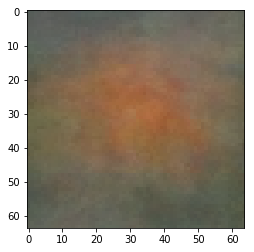

In [22]:
Y_train,mean_image,std_image = normalise_train(Y_train)
print (Y_train.shape)
print (mean_image.shape)
print (std_image.shape)
plt.imshow(mean_image[:,:,:].astype('uint8'))
plt.show()
#X_test = normalise_test(X_test,mean_image,std_image)
#print(X_test.shape)
#print (X_train.shape)

In [5]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, 64, 64,1])
Y = tf.placeholder(tf.float32 ,[None , 64,64,3])
is_training = tf.placeholder(tf.bool)

with tf.variable_scope("model") as scope:
    y_out = complex_pokemon_model(X)
    loss = tf.sqrt(tf.nn.l2_loss(y_out-Y))
    optimiser = tf.train.AdamOptimizer(1e-4)
    train_step = optimiser.minimize(loss)

    scope.reuse_variables()
    test_model = complex_pokemon_model(X,False)
    loss_test = tf.sqrt(tf.nn.l2_loss(test_model - Y))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

batch_size = 32
def train_epoch(data, target):
    sizee = data.shape[0]
    for i in range(sizee//batch_size):
        feed_dict = {Y:   (target[i*batch_size:batch_size*i+batch_size]), X: data[i*batch_size:batch_size*i+batch_size],is_training:True}
        losses,_ = sess.run([loss,train_step],feed_dict)
        if(i%5==0):
            print (losses)

  

def val_result(data, target):
    sizee = data.shape[0]
    for i in range(sizee//batch_size):
        feed_dict = {Y:  (target[i*batch_size:batch_size*i+batch_size]), X: data[i*batch_size:batch_size*i+batch_size],is_training:False}
        losses = sess.run([loss_test],feed_dict)
        if(i%5 ==0):
            print (losses)

num_epochs = 10
for i in range(num_epochs):
    train_epoch(X_train, Y_train)
    val_result(X_test, Y_test)

    



KeyboardInterrupt: 

In [9]:
### Image visualisation
import matplotlib.pyplot as plt
import numpy.random as rnd

#def rgb2gray2(rgb):
 #   a = np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
  #  return a

rand_indices = np.random.choice(400,10)
sample_images = X_train[rand_indices]
samp = Y_train[rand_indices]
print (sample_images.shape)
grayed_sample_images = (sample_images)
print (grayed_sample_images.shape)

feed_dict = {X:grayed_sample_images[:,:,:],Y:samp,is_training:True}
model_generated_images = sess.run([test_model,loss_test],feed_dict)
print (model_generated_images[1])
print(model_generated_images[0].shape)

def show_images(images,gray = False):

    
    if(gray):
        plt.subplot(221)
        plt.imshow(images[0],cmap = plt.get_cmap('gray'))
        plt.subplot(222)
        plt.imshow(images[1], cmap = plt.get_cmap('gray'))
        plt.subplot(223)
        plt.imshow(images[2], cmap = plt.get_cmap('gray'))
        plt.subplot(224)
        plt.imshow(images[3], cmap = plt.get_cmap('gray'))
    else :
        plt.subplot(221)
        plt.imshow(images[0]);
        plt.subplot(222)
        plt.imshow(images[1])
        plt.subplot(223)
        plt.imshow(images[2])
        plt.subplot(224)
        plt.imshow(images[3])

    plt.show()
    
    
show_images((samp))
#show_images(grayed_sample_images,gray = True)
show_images((model_generated_images[0]) )

    

IndexError: index 168 is out of bounds for axis 0 with size 49

In [10]:
def show_images(images,gray = False):

    
    if(gray):
        plt.imshow(images,cmap = plt.get_cmap('gray'))
    else :
        plt.imshow(images);

    plt.show()

(49, 64, 64, 3)
0.84148


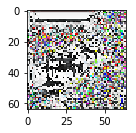

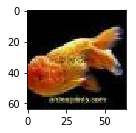

0.497652


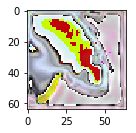

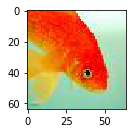

Next Epoch 0
0.377245
0.333559
Next Epoch 1
0.296332
0.282962
Next Epoch 2
0.241795
0.235454
Next Epoch 3
0.219652
0.210732
Next Epoch 4
0.205857


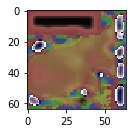

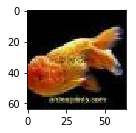

0.198466


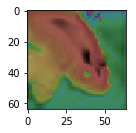

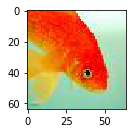

Next Epoch 5
0.200048
0.192888
Next Epoch 6
0.186586
0.18204
Next Epoch 7
0.168925
0.172036
Next Epoch 8
0.161844
0.168424
Next Epoch 9
0.153543


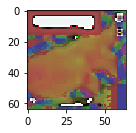

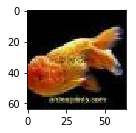

0.157202


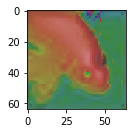

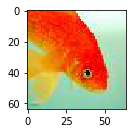

Next Epoch 10
0.150477
0.155718
Next Epoch 11
0.148909
0.149954
Next Epoch 12
0.148264
0.148444
Next Epoch 13
0.147188
0.14593
Next Epoch 14
0.145821


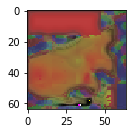

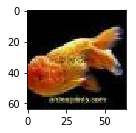

0.143564


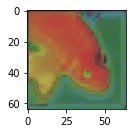

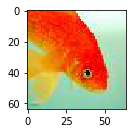

Next Epoch 15
0.144965
0.140069
Next Epoch 16
0.144536
0.137181
Next Epoch 17
0.142918
0.136163
Next Epoch 18
0.142237
0.133625
Next Epoch 19
0.140849


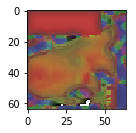

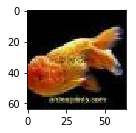

0.132795


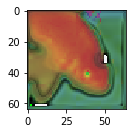

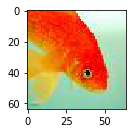

Next Epoch 20
0.13723
0.135047
Next Epoch 21
0.135499
0.135483
Next Epoch 22
0.14128
0.174098
Next Epoch 23
0.144129
0.163181
Next Epoch 24
0.155193


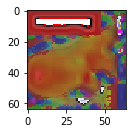

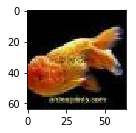

0.168318


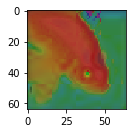

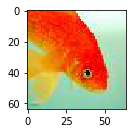

Next Epoch 25
0.165375
0.161271
Next Epoch 26
0.16456
0.160688
Next Epoch 27
0.164766
0.162814
Next Epoch 28
0.163865
0.162583
Next Epoch 29
0.161439


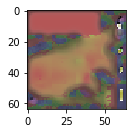

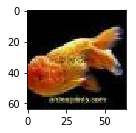

0.160684


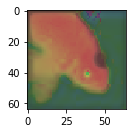

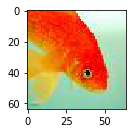

Next Epoch 30
0.157681
0.155892
Next Epoch 31
0.148779
0.149645
Next Epoch 32
0.14664
0.147771
Next Epoch 33
0.143886
0.160209
Next Epoch 34
0.149018


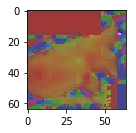

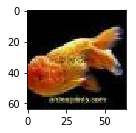

0.153463


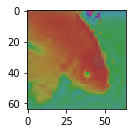

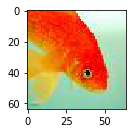

Next Epoch 35
0.158086
0.154715
Next Epoch 36
0.155015
0.15238
Next Epoch 37
0.150389
0.151176
Next Epoch 38
0.147825
0.150051
Next Epoch 39
0.147177


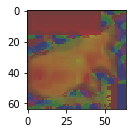

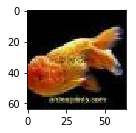

0.149032


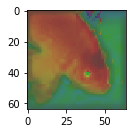

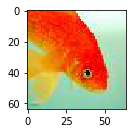

Next Epoch 40
0.147833
0.148498
Next Epoch 41
0.147344
0.146818
Next Epoch 42
0.146061
0.144419
Next Epoch 43
0.145215
0.142699
Next Epoch 44
0.144595


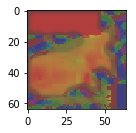

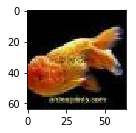

0.142047


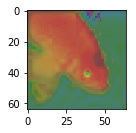

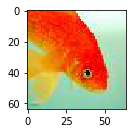

Next Epoch 45
0.144116
0.141611
Next Epoch 46
0.142922
0.140927
Next Epoch 47
0.140856
0.140654
Next Epoch 48
0.138096
0.141091
Next Epoch 49
0.136498


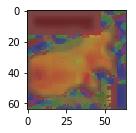

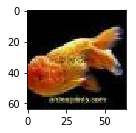

0.140823


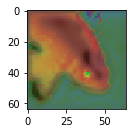

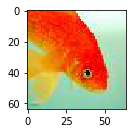

Next Epoch 50
0.135349
0.138458
Next Epoch 51
0.135981
0.136644
Next Epoch 52
0.134966
0.135704
Next Epoch 53
0.133021
0.135714
Next Epoch 54
0.131195


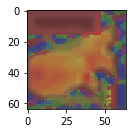

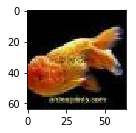

0.135137


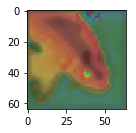

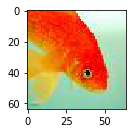

Next Epoch 55
0.130767
0.133047
Next Epoch 56
0.130194
0.131145
Next Epoch 57
0.129783
0.130339
Next Epoch 58
0.12796
0.130192
Next Epoch 59
0.127153


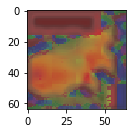

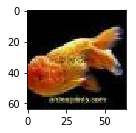

0.127725


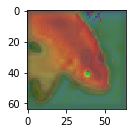

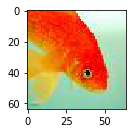

Next Epoch 60
0.129263
0.126813
Next Epoch 61
0.128181
0.128742
Next Epoch 62
0.126367
0.158711
Next Epoch 63
0.151973
0.153898
Next Epoch 64
0.167735


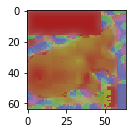

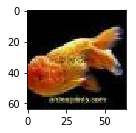

0.158558


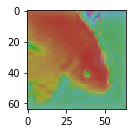

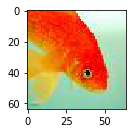

Next Epoch 65
0.166075
0.155804
Next Epoch 66
0.162669
0.153437
Next Epoch 67
0.157088
0.154639
Next Epoch 68
0.156029
0.160019
Next Epoch 69
0.152815


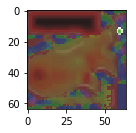

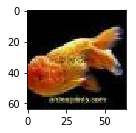

0.155771


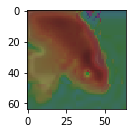

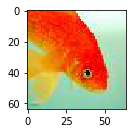

Next Epoch 70
0.151322
0.152416
Next Epoch 71
0.147828
0.147945
Next Epoch 72
0.144898
0.14457
Next Epoch 73
0.142007
0.141589
Next Epoch 74
0.139275


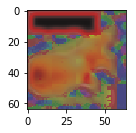

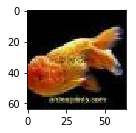

0.138452


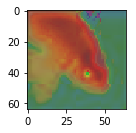

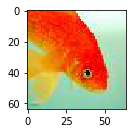

Next Epoch 75
0.135336
0.138212
Next Epoch 76
0.136419
0.147236
Next Epoch 77
0.149359
0.143251
Next Epoch 78
0.14187
0.139162
Next Epoch 79
0.14327


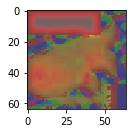

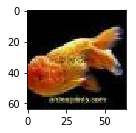

0.141182


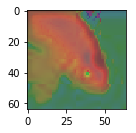

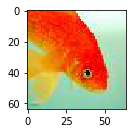

Next Epoch 80
0.142545
0.142113
Next Epoch 81
0.139717
0.14255
Next Epoch 82
0.138768
0.139662
Next Epoch 83
0.138049
0.138266
Next Epoch 84
0.13716


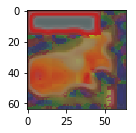

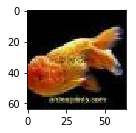

0.137553


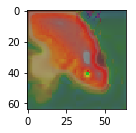

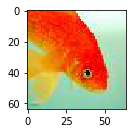

Next Epoch 85
0.134371
0.135252
Next Epoch 86
0.132631
0.135232
Next Epoch 87
0.130469
0.135258
Next Epoch 88
0.128733
0.133279
Next Epoch 89
0.127348


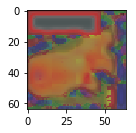

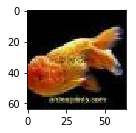

0.132167


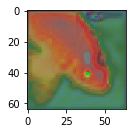

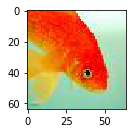

Next Epoch 90
0.127607
0.130862
Next Epoch 91
0.126935
0.129997
Next Epoch 92
0.126656
0.13176
Next Epoch 93
0.129561
0.132102
Next Epoch 94
0.126279


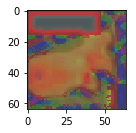

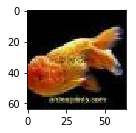

0.133062


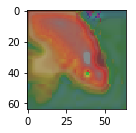

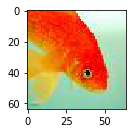

Next Epoch 95
0.126011
0.131304
Next Epoch 96
0.125588
0.130499
Next Epoch 97
0.123717
0.133029
Next Epoch 98
0.133794
0.133856
Next Epoch 99


In [53]:
tf.reset_default_graph()

#X = tf.placeholder(tf.float32, [None, 64, 64,1])

Y = tf.placeholder(tf.uint8 ,[None , 64,64,3])

is_training = tf.placeholder(tf.bool)

#X_train = lab_data[...,0:1]
#Y_train = lab_data[...,1:3]
#print (X_train.shape)
print (Y_train.shape)

with tf.variable_scope("model") as scope:
    #y_out = simpler_model(X)
    #y_out = complex_pokemon_model(X,True)
    #hsv_out,rgb_out,hsv_in,rgb_in = baselinish2(Y,is_training)
    hsv_out,rgb_out,hsv_in,rgb_in = complex_pokemon_model2(Y,is_training)
    loss = tf.reduce_mean(tf.square(hsv_out-hsv_in))
    
    #### A different loss function
    #tf.concat
    #lab2rgb(original_data[0,:,:,:]*std_dat + mean_dat )
    
    optimiser = tf.train.AdamOptimizer(4e-2)
    train_step = optimiser.minimize(loss)

    #scope.reuse_variables()
    #test_model = simpler_model(X,False)
    #test_model = complex_pokemon_model(X,False)
    #test_model = baselinish()
    #loss_test = (tf.nn.l2_loss(test_model - Y))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

batch_size = 24
epoch_number = 0
def train_epoch(target):
    sizee = target.shape[0]
    for i in range(sizee//batch_size):
        feed_dict = {Y: (target[i*batch_size:batch_size*i+batch_size]),is_training:True}
        losses,_,rgb_o,rgb_i = sess.run([loss,train_step,rgb_out,rgb_in],feed_dict)
        #if(i%5==0):
        print (losses)
        if(epoch_number %5 == 0):
            show_images(rgb_o[5])
            show_images(rgb_i[5])

  

def val_result(data, target):
    sizee = data.shape[0]
    for i in range(sizee//batch_size):
        feed_dict = {Y:  (target[i*batch_size:batch_size*i+batch_size]), X: data[i*batch_size:batch_size*i+batch_size],is_training:False}
        losses = sess.run([loss_test,rgb_out],feed_dict)
        if(i%5 ==0):
            print (losses)

num_epochs = 100
for i in range(num_epochs):
    epoch_number = i
    train_epoch(Y_train)
    print ("Next Epoch",i)
    
    #val_result(X_test, Y_test)

    


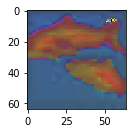

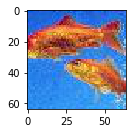

In [54]:
### Image visualisation
import matplotlib.pyplot as plt
import numpy.random as rnd

#def rgb2gray2(rgb):
 #   a = np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
  #  return a

rand_indices = np.random.choice(40,24)
#sample_images = X_train[rand_indices]
samp = Y_train[rand_indices]
#original_data = lab_data[rand_indices]
#sample_images = original_data[:,:,:,0:1]
#print (np.min(original_data[:,:,:,1:2]))
#print (np.max(original_data[:,:,:,1:2]))
#print (sample_images.shape)
#print (samp.shape)
#print (original_data.shape)

feed_dict = {Y:samp,is_training:True}
losses,_,rgb_o,rgb_i = sess.run([loss,train_step,rgb_out,rgb_in],feed_dict)
show_images(rgb_o[0])
show_images(rgb_i[0])
#model_generated_images = sess.run([y_out,loss],feed_dict)
#print (model_generated_images[1])
#print(model_generated_images[0].shape)

def show_images(images,gray = False):

    
    if(gray):
        plt.subplot(221)
        plt.imshow(images,cmap = plt.get_cmap('gray'))
        #plt.subplot(222)
        #plt.imshow(images[1], cmap = plt.get_cmap('gray'))
        #plt.subplot(223)
        #plt.imshow(images[2], cmap = plt.get_cmap('gray'))
        #plt.subplot(224)
        #plt.imshow(images[3], cmap = plt.get_cmap('gray'))
    else :
        plt.subplot(221)
        plt.imshow(images);
        #plt.subplot(222)
        #plt.imshow(images[1])
        #plt.subplot(223)
        #plt.imshow(images[2])
        #plt.subplot(224)
        #plt.imshow(images[3])

    plt.show()
    
#show_images(lab2rgb(original_data[0,:,:,:]  ) )
#show_images((samp[0]).astype('uint8'))
#original_data[...,1:3] = model_generated_images[0]
#show_images(original_data[0,:,:,0],gray = True)
#show_images(lab2rgb(original_data[0,:,:,:]*std_dat +mean_dat))
#show_images((model_generated_images[0][0] ).astype('uint8'))
    